In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
import numpy as np

data = {
    "date": [
        "13 April Sun", "14 April Mon", "15 April Tue", "16 April Wed", "17 April Thu", "18 April Fri", "19 April Sat",
        "20 April Sun", "21 April Mon", "22 April Tue", "23 April Wed", "24 April Thu", "25 April Fri", "26 April Sat",
        "27 April Sun", "28 April Mon", "29 April Tue", "30 April Wed", "1 May Thu", "2 May Fri", "3 May Sat",
        "4 May Sun", "5 May Mon", "6 May Tue", "7 May Wed", "8 May Thu", "9 May Fri", "10 May Sat", "11 May Sun",
        "12 May Mon", "13 May Tue", "14 May Wed", "15 May Thu", "16 May Fri", "17 May Sat", "18 May Sun", "19 May Mon",
        "20 May Tue", "21 May Wed", "22 May Thu", "23 May Fri", "24 May Sat", "25 May Sun", "26 May Mon", "27 May Tue",
        "28 May Wed", "29 May Thu", "30 May Fri", "31 May Sat", "1 June Sun", "2 June Mon", "3 June Tue", "4 June Wed",
        "5 June Thu", "6 June Fri", "7 June Sat", "8 June Sun", "9 June Mon", "10 June Tue", "11 June Wed",
        "12 June Thu", "13 June Fri", "14 June Sat"
    ],
    "Number of visitors": [
        146426, 70488, 63719, 73869, 82692, 93908, 108773,
        95524, 99638, 103729, 99140, 108888, 110759, 122102,
        102015, 121282, 97559, 101397, 105945, 104805, 120696,
        136805, 126371, 76517, 91688, 105449, 105782, 128918, 121667,
        117658, 123640, 129527, 129456, 132817, 123974, 121927, 133661,
        129506, 133581, 137767, 163509, 132105, 143752, 149197, 139790,
        149383, 145291, 152666, 187762, 152473, 150131, 108130, 137675,
        139576, 165243, 173305, 151565, 137452, 110260, 126489,
        141488, 167424, 153590
    ],
    "Number of visitors with AD": [
        22087, 16828, 15938, 15166, 15040, 15187, 14692,
        16142, 17352, 17099, 17795, 17376, 17591, 17299,
        16985, 17465, 17813, 17621, 17548, 17741, 17886,
        16289, 16804, 16935, 16932, 18578, 19813, 21373, 18268,
        17856, 18087, 17668, 17762, 17700, 16464, 16404, 17441,
        17856, 19012, 18026, 18264, 16373, 16746, 18174, 18875,
        18852, 18578, 18599, 17839, 18970, 17780, 17423, 17965,
        18046, 19094, 17808, 19040, 17886, 18217, 18144,
        18683, 18567, 18119
    ]
}

df = pd.DataFrame(data)

# chage form to datetime
df['date'] = pd.to_datetime(df['date'] + " 2025", format="%d %B %a %Y")

print(df)

         date  Number of visitors  Number of visitors with AD
0  2025-04-13              146426                       22087
1  2025-04-14               70488                       16828
2  2025-04-15               63719                       15938
3  2025-04-16               73869                       15166
4  2025-04-17               82692                       15040
..        ...                 ...                         ...
58 2025-06-10              110260                       18217
59 2025-06-11              126489                       18144
60 2025-06-12              141488                       18683
61 2025-06-13              167424                       18567
62 2025-06-14              153590                       18119

[63 rows x 3 columns]


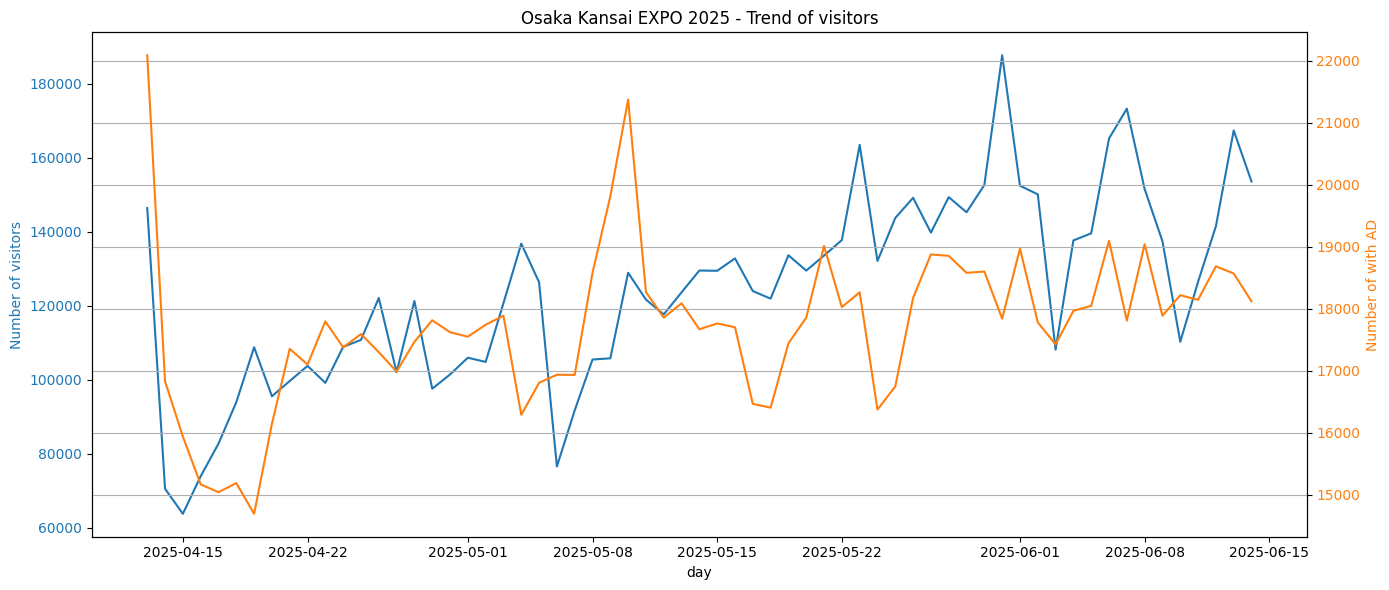

In [26]:
# creates DF
df = pd.DataFrame(data)
df['date'] = pd.to_datetime(df['date'] + ' 2025', format='%d %B %a %Y')
df.set_index('date', inplace=True)

# double y axi
fig, ax1 = plt.subplots(figsize=(14, 6))

# left : total 
color = 'tab:blue'
ax1.set_xlabel('day')
ax1.set_ylabel('Number of visitors', color=color)
ax1.plot(df.index, df["Number of visitors"], color=color, label='Number of visitors')
ax1.tick_params(axis='y', labelcolor=color)

# right : with AD
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('Number of with AD', color=color)
ax2.plot(df.index, df["Number of visitors with AD"], color=color, label='Number of AD', )
ax2.tick_params(axis='y', labelcolor=color)

# shows that
plt.title("Osaka Kansai EXPO 2025 - Trend of visitors")
fig.tight_layout()
plt.grid(True)
plt.show()



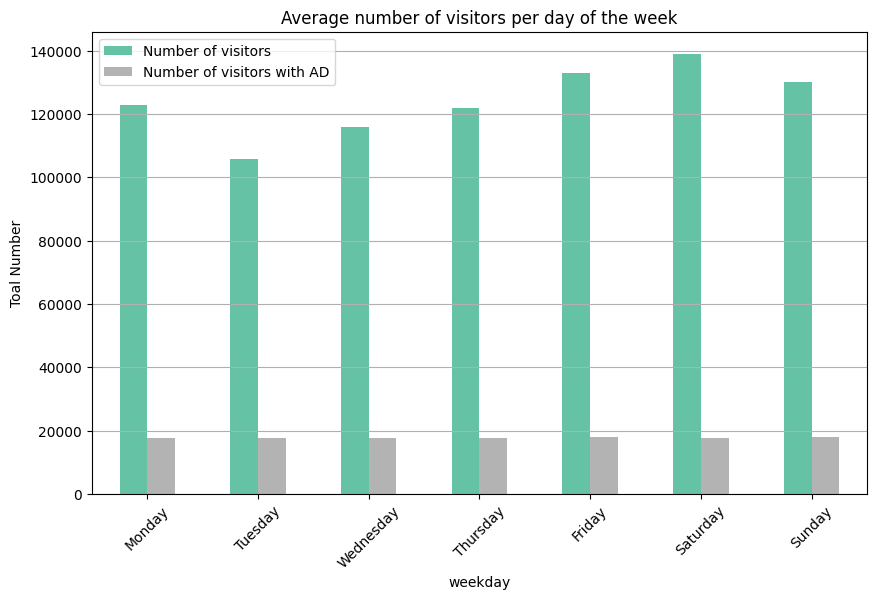

In [31]:
df["weekday"] = df.index.day_name()

# avg weekly
weekday_avg = df.groupby("weekday")[["Number of visitors", "Number of visitors with AD"]].mean()

# reset for w
order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
weekday_avg = weekday_avg.loc[order]

# shows that
weekday_avg.plot(kind="bar", figsize=(10, 6), colormap="Set2")
plt.title("Average number of visitors per day of the week")
plt.ylabel("Toal Number")
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()


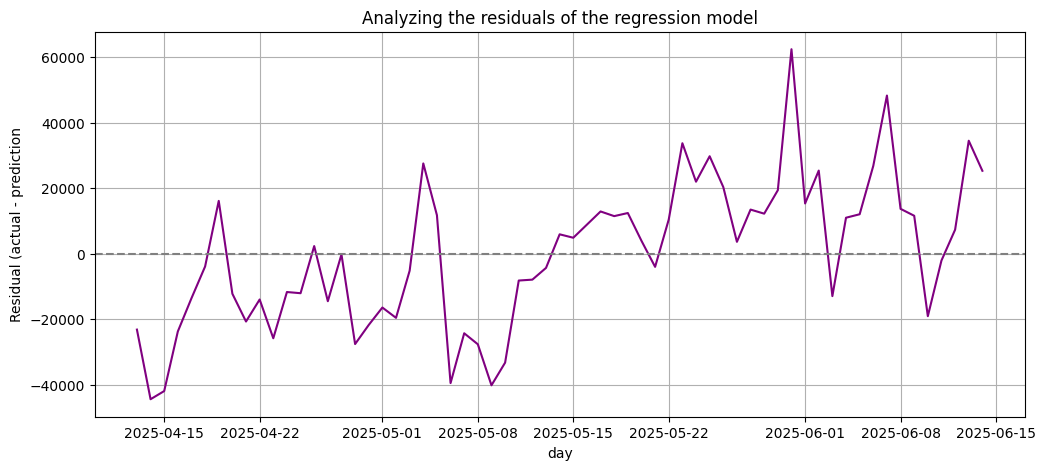

In [33]:
# add for
df['predicted'] = model.predict(X)
df['residual'] = df['Number of visitors'] - df['predicted']

# go that
plt.figure(figsize=(12, 5))
plt.plot(df.index, df['residual'], label="ÏûîÏ∞®", color="purple")
plt.axhline(0, linestyle='--', color='gray')
plt.title("Analyzing the residuals of the regression model")
plt.xlabel("day")
plt.ylabel("Residual (actual - prediction")
plt.grid(True)
plt.show()


Î∂ÑÏÑù ÎÇ¥Ïö©	ÏöîÏïΩ

‚úÖ Ï†ÑÏ≤¥ Ï∂îÏù¥	4Ïõî Ï§ëÏàúÎ∂ÄÌÑ∞ Ï†êÏßÑÏ†ÅÏúºÎ°ú Ï¶ùÍ∞Ä, 5Ïõî Îßê~6Ïõî Ï¥à ÌîºÌÅ¨

‚úÖ ÌöåÍ∑Ä Í≤∞Í≥º	Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê ÏàòÍ∞Ä Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÎ•º ÏùºÏ†ï ÎπÑÏú®Î°ú ÏòàÏ∏° Í∞ÄÎä•

‚úÖ ÏöîÏùºÎ≥Ñ Î∂ÑÏÑù	Ï£ºÎßêÏóê ÏùºÎ∞ò Î∞©Î¨∏Ïûê Ïàò Í∏âÏ¶ù, ÌèâÏùºÏùÄ Ï∂úÏûÖÏ¶ù ÎπÑÏú®Ïù¥ ÎÜíÏùå

‚úÖ ÏûîÏ∞® Î∂ÑÏÑù	ÏùºÎ∂Ä ÎÇ†ÏßúÎäî Ïù¥Î≤§Ìä∏ ÏòÅÌñ•ÏúºÎ°ú ÌöåÍ∑Ä ÏòàÏ∏°Î≥¥Îã§ ÎÜíÏùÄ Ìé∏Ï∞®

‚úÖ Ï∂úÏûÖÏ¶ù ÎπÑÏú®	ÏïΩ 15~18% ÎπÑÏú®Î°ú ÏïàÏ†ïÏ†ÅÏù¥ÎÇò, ÌäπÏ†ï Ïù¥Î≤§Ìä∏ ÎÇ†ÏßúÏóê ÏÜåÌè≠ Î≥ÄÌôî

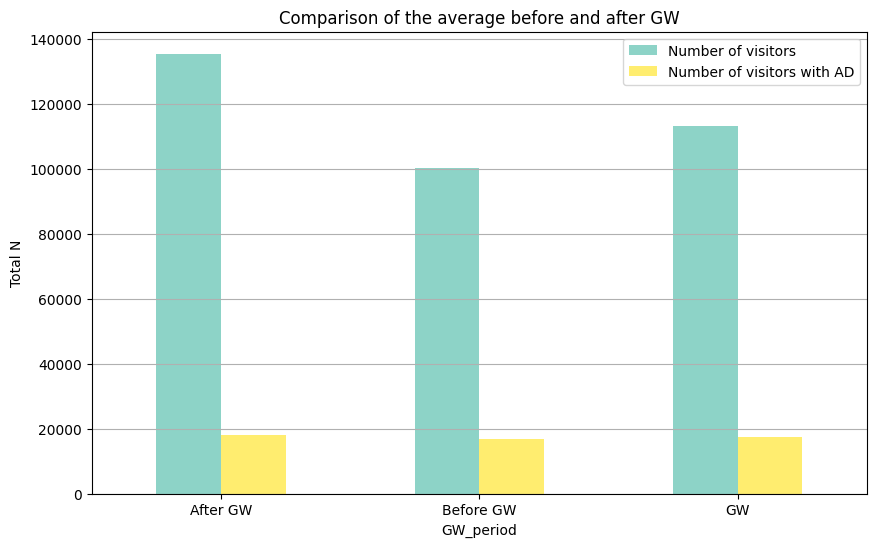

In [37]:
# Before and after Golden Week
df["GW_period"] = "Í∏∞ÌÉÄ"
df.loc[(df.index >= "2025-04-29") & (df.index <= "2025-05-05"), "GW_period"] = "GW"
df.loc[(df.index < "2025-04-29"), "GW_period"] = "Before GW"
df.loc[(df.index > "2025-05-05"), "GW_period"] = "After GW"

# Comparison of the average before and after Golden Week
gw_avg = df.groupby("GW_period")[["Number of visitors", "Number of visitors with AD"]].mean()

# Visualization
gw_avg.plot(kind="bar", figsize=(10, 6), colormap="Set3")
plt.title("Comparison of the average before and after GW")
plt.ylabel("Total N")
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.show()


üß† Ìï¥ÏÑù
Í≥®Îì†ÏúÑÌÅ¨ Í∏∞Í∞Ñ Ï§ë Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÍ∞Ä Í∏âÏ¶ù (5/3~5/5 ÌäπÌûà ÎëêÎìúÎü¨Ïßê)

Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê ÏàòÎäî ÌÅ∞ Î≥ÄÌôî ÏóÜÏùå ‚Üí ÌñâÏÇ¨/ÏùºÎ∞ò Î∞©Î¨∏ÏûêÏùò Î≥ÄÌôîÍ∞Ä Ï£ºÏöî ÏõêÏù∏ÏúºÎ°ú Ï∂îÏ†ï Í∞ÄÎä•



In [53]:
from sklearn.metrics import r2_score, mean_squared_error


# Create a weekend dummy variable
df["is_weekend"] = (df.index.weekday >= 5).astype(int)
X = df[["Number of visitors with AD", "is_weekend"]]
y = df["Number of visitors"]

# learn
model = LinearRegression()
model.fit(X, y)

# predict 
y_pred = model.predict(X)

# print results
print("(Intercept):", model.intercept_)
print("(Coefficients):", model.coef_)
print("(R¬≤):", r2_score(y, y_pred))
print("(MSE):", mean_squared_error(y, y_pred))


(Intercept): -64539.52628037149
(Coefficients): [1.04107628e+01 1.47947697e+04]
(R¬≤): 0.325619163753496
(MSE): 447024283.4489598


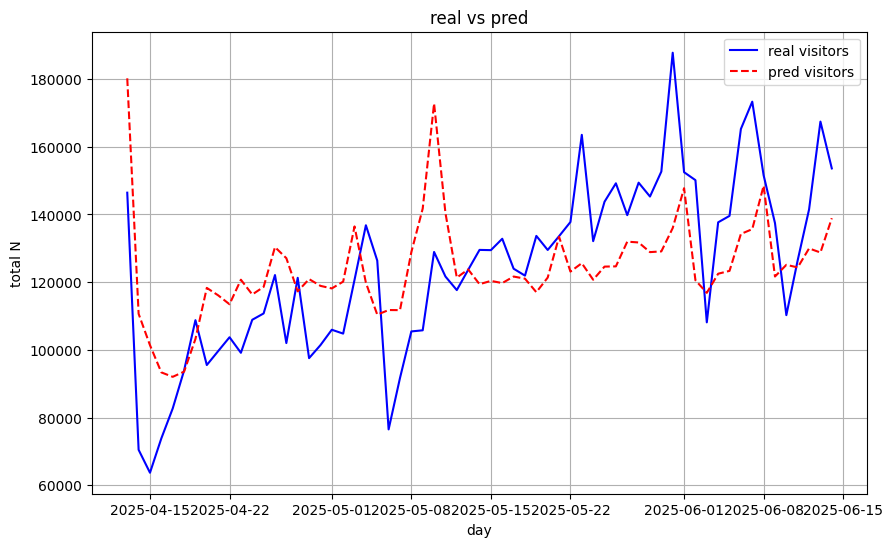

In [54]:
plt.figure(figsize=(10, 6))
plt.plot(df.index, y, label="real visitors", color='blue')
plt.plot(df.index, y_pred, label="pred visitors", color='red', linestyle='--')
plt.title("real vs pred")
plt.xlabel("day")
plt.ylabel("total N")
plt.legend()
plt.grid(True)
plt.show()


# ‚úÖ ÌöåÍ∑Ä Í≤∞Í≥º

| Ìï≠Î™©                       | Ìï¥ÏÑù                                                                                                                                      |
| ------------------------ | --------------------------------------------------------------------------------------------------------------------------------------- |
| **Ï†àÌé∏** `-64,539.53`      | Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê Ïàò = 0Ïù¥Í≥†, ÌèâÏùºÏùº Îïå Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÎäî **-64,000Î™ÖÏúºÎ°ú ÏùåÏàò** ‚Üí **Î™®Îç∏Ïù¥ ÌòÑÏã§Ï†ÅÏúºÎ°ú Ïûò ÏÑ§Î™ÖÌïòÏßÄ Î™ªÌï®**. Ïù¥Îäî Ï†àÌé∏Ïù¥ ÌòÑÏã§Í≥º ÎßûÏßÄ ÏïäÎã§Îäî ÎúªÏù¥Î©∞, ÎπÑÏÑ†ÌòïÏÑ±Ïù¥ ÏûàÍ±∞ÎÇò Ï§ëÏöîÌïú Î≥ÄÏàòÍ∞Ä Îπ†Ï°åÏùÑ Ïàò ÏûàÏùåÏùÑ ÏãúÏÇ¨ÌïúÎã§. |
| **Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê Ïàò Í≥ÑÏàò** `10.41` | Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê Ïàò 1Î™Ö Ï¶ùÍ∞Ä Ïãú Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÍ∞Ä **ÌèâÍ∑†Ï†ÅÏúºÎ°ú ÏïΩ 10.41Î™Ö Ï¶ùÍ∞Ä**. Ï¶â, Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê ÏàòÍ∞Ä Ï†ÑÏ≤¥ Î∞©Î¨∏ÏûêÏùò ÎåÄÌëúÏ†Å ÏßÄÌëú Ïó≠Ìï†ÏùÑ ÌïòÍ≥† ÏûàÏùåÏùÑ ÏùòÎØ∏ÌïúÎã§.                                       |
| **Ï£ºÎßê Ïó¨Î∂Ä Í≥ÑÏàò** `14,794.77` | Ï£ºÎßêÏù¥Î©¥, ÌèâÏùºÎ≥¥Îã§ **Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÍ∞Ä ÏïΩ 1.5Îßå Î™Ö Îçî ÎßéÏùå**. Ï£ºÎßê Ìö®Í≥ºÎäî **ÏûàÏßÄÎßå Í∑∏Î¶¨ ÌÅ¨ÏßÄ ÏïäÏùå**.                                                                        |
| **R¬≤ (Í≤∞Ï†ïÍ≥ÑÏàò)** `0.326`    | Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÏùò Î≥ÄÎèôÏÑ± Ï§ë ÏïΩ **32.6%Îßå ÏÑ§Î™Ö Í∞ÄÎä•** ‚Üí **ÏÑ§Î™ÖÎ†•Ïù¥ ÎÇÆÏùå**. Ï¶â, Ïù¥ Î™®Îç∏Î°úÎäî Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê ÏàòÎ•º Ïûò ÏòàÏ∏°ÌïòÏßÄ Î™ªÌïúÎã§.                                                      |
| **MSE** `~4,470Îßå`        | ÏòàÏ∏° Ïò§Ï∞®Ïùò Ï†úÍ≥± ÌèâÍ∑†Ïù¥ Îß§Ïö∞ ÌÅ¨ÎØÄÎ°ú, Ïò§Ï∞®Í∞Ä ÌÅºÏùÑ ÏùòÎØ∏ÌïúÎã§.                                                                                                     |



# ----------------------------------------------------
Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê ÏàòÎäî Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê Ïàò Ï¶ùÍ∞ÄÏóê Ïú†ÏùòÎØ∏Ìïú ÏòÅÌñ•Ïù¥ ÏûàÏúºÎ©∞

Ï£ºÎßê Ïó¨Î∂ÄÎèÑ Í∞ïÎ†•Ìïú ÏÑ§Î™Ö Î≥ÄÏàòÎ°ú ÏûëÏö©ÌïúÎã§.

ÎèôÏùºÌïú Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê ÏàòÏùº Í≤ΩÏö∞ÏóêÎèÑ Ï£ºÎßêÏóêÎäî Î∞©Î¨∏ÏûêÍ∞Ä 2~3Îßå Î™Ö Îçî ÎßéÏùå.

Í≥®Îì†ÏúÑÌÅ¨ Í∏∞Í∞ÑÏùÄ Ï£ºÎßê Ïù¥ÏÉÅÏùò Í∏âÏ¶ùÏù¥ ÌôïÏù∏ÎêòÎ©∞, Ïù¥Îäî ÌäπÏàò Ïù¥Î≤§Ìä∏ Ìö®Í≥º ÎïåÎ¨∏ÏûÑÏùÑ ÏãúÏÇ¨ÌïúÎã§.
# ----------------------------------------------------


| ÏöîÏÜå                         | Î∂ÑÏÑù Í≤∞Í≥º                                          |
| -------------------------- | ---------------------------------------------- |
| üî• **Ï£ºÎßê (ÌÜ†/Ïùº)**            | Ï†ÑÏ≤¥ Î∞©Î¨∏Ïûê Ïàò Í∏âÏ¶ù ‚Üí **ÌòºÏû°**                           |
| üèñ **Í≥®Îì†ÏúÑÌÅ¨ Í∏∞Í∞Ñ (4/29\~5/5)** | ÏµúÍ≥† ÌòºÏû°ÎèÑ, ÌïòÎ£® 13Îßå\~15Îßå Î™Ö Î∞©Î¨∏ ‚Üí **Í∞ÄÏû• Î∂êÎπî**           |
| üìâ **ÌèâÏùº (Ìôî\~Î™©)**           | ÎπÑÍµêÏ†Å Î∞©Î¨∏Ïûê Ïàò ÎÇÆÍ≥† Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê ÎπÑÏú® ÎÜíÏùå ‚Üí **ÏæåÏ†ÅÌïú Í¥ÄÎûå Í∞ÄÎä•ÏÑ± ÎÜíÏùå** |
| üßæ **Ï∂úÏûÖÏ¶ù Î∞©Î¨∏Ïûê Ïàò**           | ÌèâÏùº/Ï£ºÎßê ÎπÑÏä∑Ìïú ÏàòÏ§Ä (ÏùºÏ†ïÌïú Í∏∞Í¥Ä Í¥ÄÍ≥ÑÏûê Ïú†ÏûÖ)                   |
| üéØ **5Ïõî Ï§ëÏàú\~Îßê ÌèâÏùº**         | Î∞©Î¨∏Ïûê Ïàò Ï¶ùÍ∞ÄÌïòÍ∏¥ ÌïòÏßÄÎßå Ï£ºÎßêÎßåÌÅºÏùÄ ÏïÑÎãò                        |


## ‚úÖ Í∞ÄÏû• Ï∂îÏ≤ú ÏöîÏùº
# <ÌôîÏöîÏùº, ÏàòÏöîÏùº, Î™©ÏöîÏùº>